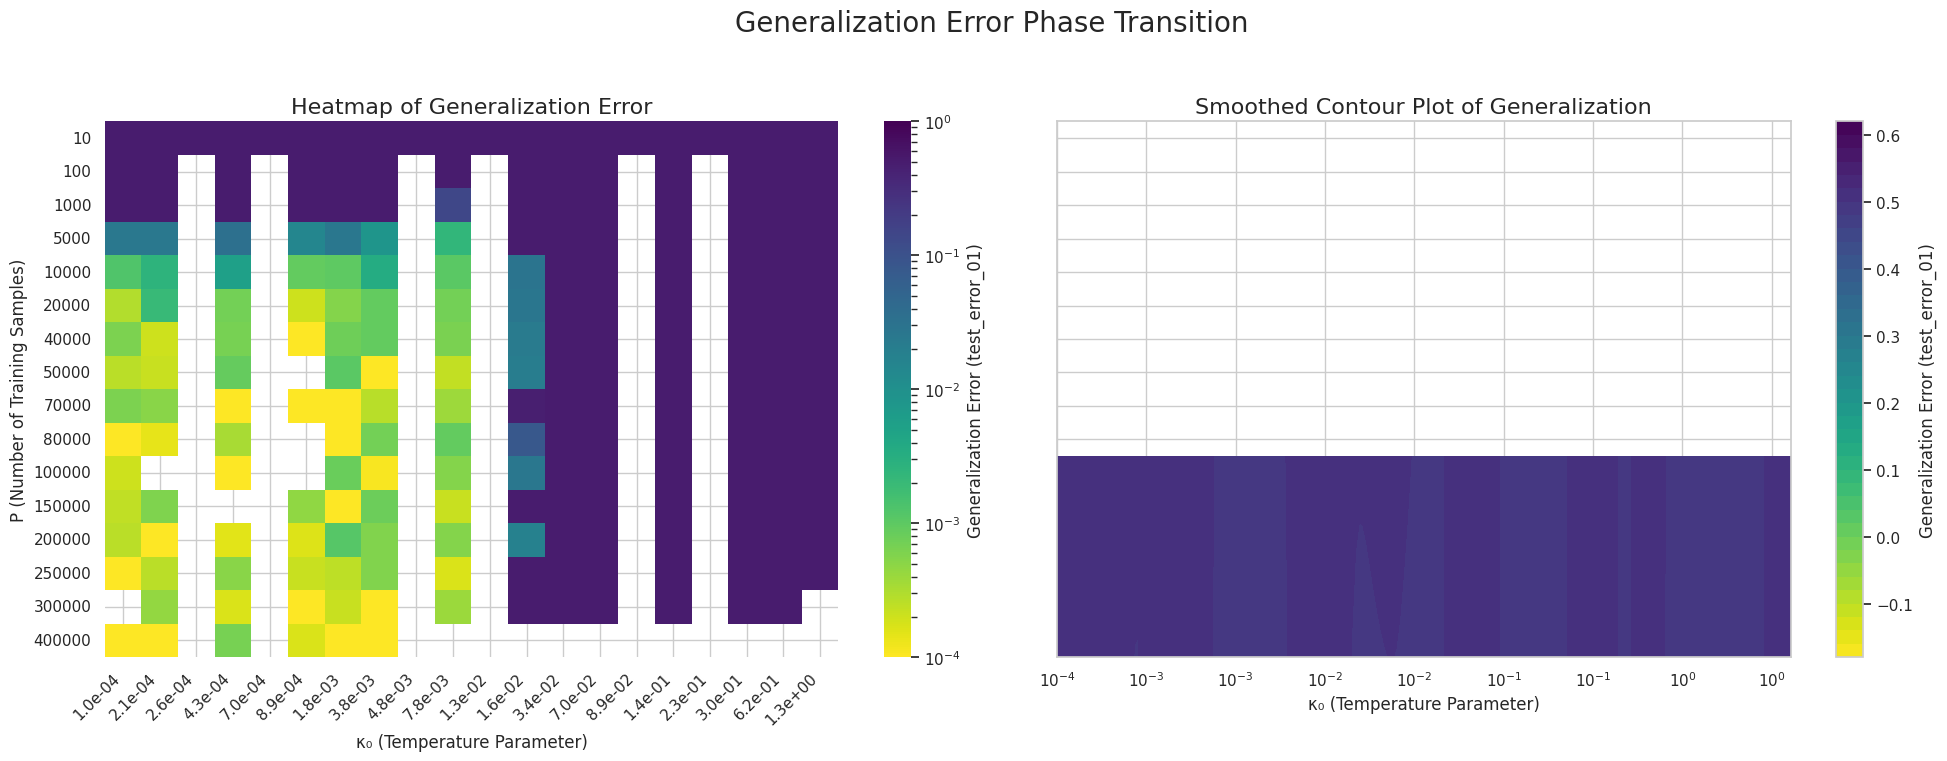

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatter, FuncFormatter
import seaborn as sns
from scipy.interpolate import griddata

def plot_phase_transition(json_path):
    """
    Loads experiment results from a JSON file and creates two plots:
    1. A direct heatmap of the generalization error.
    2. A smoothed contour plot to visualize the phase transition.

    Args:
        json_path (str or Path): The path to the training_results.json file.
    """
    # --- 1. Load and Preprocess Data ---
    try:
        with open(json_path, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file was not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode the JSON file. It might be empty or corrupted.")
        return

    if not results:
        print("The results file is empty. No data to plot.")
        return
        
    # Convert to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(results)

    # Ensure required columns exist
    required_cols = {'P', 'kappa_0', 'test_error_01'}
    if not required_cols.issubset(df.columns):
        print(f"Error: The JSON file must contain the columns: {required_cols}")
        return

    # Drop any rows with NaN values in the test error (from diverged runs)
    df.dropna(subset=['test_error_01'], inplace=True)
    
    # --- 2. Create Plots ---
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle('Generalization Error Phase Transition', fontsize=20)

    # --- 3. Plot 1: Standard Heatmap ---
    try:
        # Pivot the data to create a grid for the heatmap
        heatmap_data = df.pivot(index='P', columns='kappa_0', values='test_error_01')
        # Sort columns to ensure kappa_0 is in order
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Use a perceptually uniform colormap
        cmap = "viridis_r" # _r reverses the map (lower is better)
        
        sns.heatmap(
            heatmap_data,
            ax=axes[0],
            cmap=cmap,
            cbar_kws={'label': 'Generalization Error (test_error_01)'},
            norm=mcolors.LogNorm(vmin=df['test_error_01'].min() + 1e-4, vmax=1.0) # Log color scale
        )
        axes[0].set_title('Heatmap of Generalization Error', fontsize=16)
        axes[0].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        axes[0].set_ylabel('P (Number of Training Samples)', fontsize=12)
        # Format x-axis ticks for better readability
        axes[0].set_xticklabels([f'{float(t.get_text()):.1e}' for t in axes[0].get_xticklabels()], rotation=45, ha='right')

    except Exception as e:
        axes[0].text(0.5, 0.5, f"Could not generate heatmap.\nError: {e}", ha='center', va='center')


    # --- 4. Plot 2: Smoothed Contour Plot ---
    try:
        # Prepare data points for interpolation
        # We use log of kappa for smoother interpolation in log space
        x = np.log10(df['kappa_0'])
        y = df['P']
        z = df['test_error_01']

        # Create a grid to interpolate onto
        xi = np.linspace(x.min(), x.max(), 200)
        yi = np.linspace(y.min(), y.max(), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate the data
        zi = griddata((x, y), z, (xi, yi), method='cubic')

        # Plot the filled contour
        contour = axes[1].contourf(xi, yi, zi, levels=50, cmap=cmap)
        axes[1].set_title('Smoothed Contour Plot of Generalization', fontsize=16)
        axes[1].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        
        # Format the x-axis to show original kappa values instead of log10
        def log_to_val(tick_val, pos):
            return f"$10^{{{int(tick_val)}}}$"
        
        formatter = FuncFormatter(log_to_val)
        axes[1].xaxis.set_major_formatter(formatter)

        # Add a color bar
        fig.colorbar(contour, ax=axes[1], label='Generalization Error (test_error_01)')

    except Exception as e:
        axes[1].text(0.5, 0.5, f"Could not generate contour plot.\nError: {e}", ha='center', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace this with the actual path to your results file
    results_file_path = '/home/goring/mean_field_langevin/Langevin_training/results/d30_k4_3107_gridgamma1/training_results.json'
    
    plot_phase_transition(results_file_path)



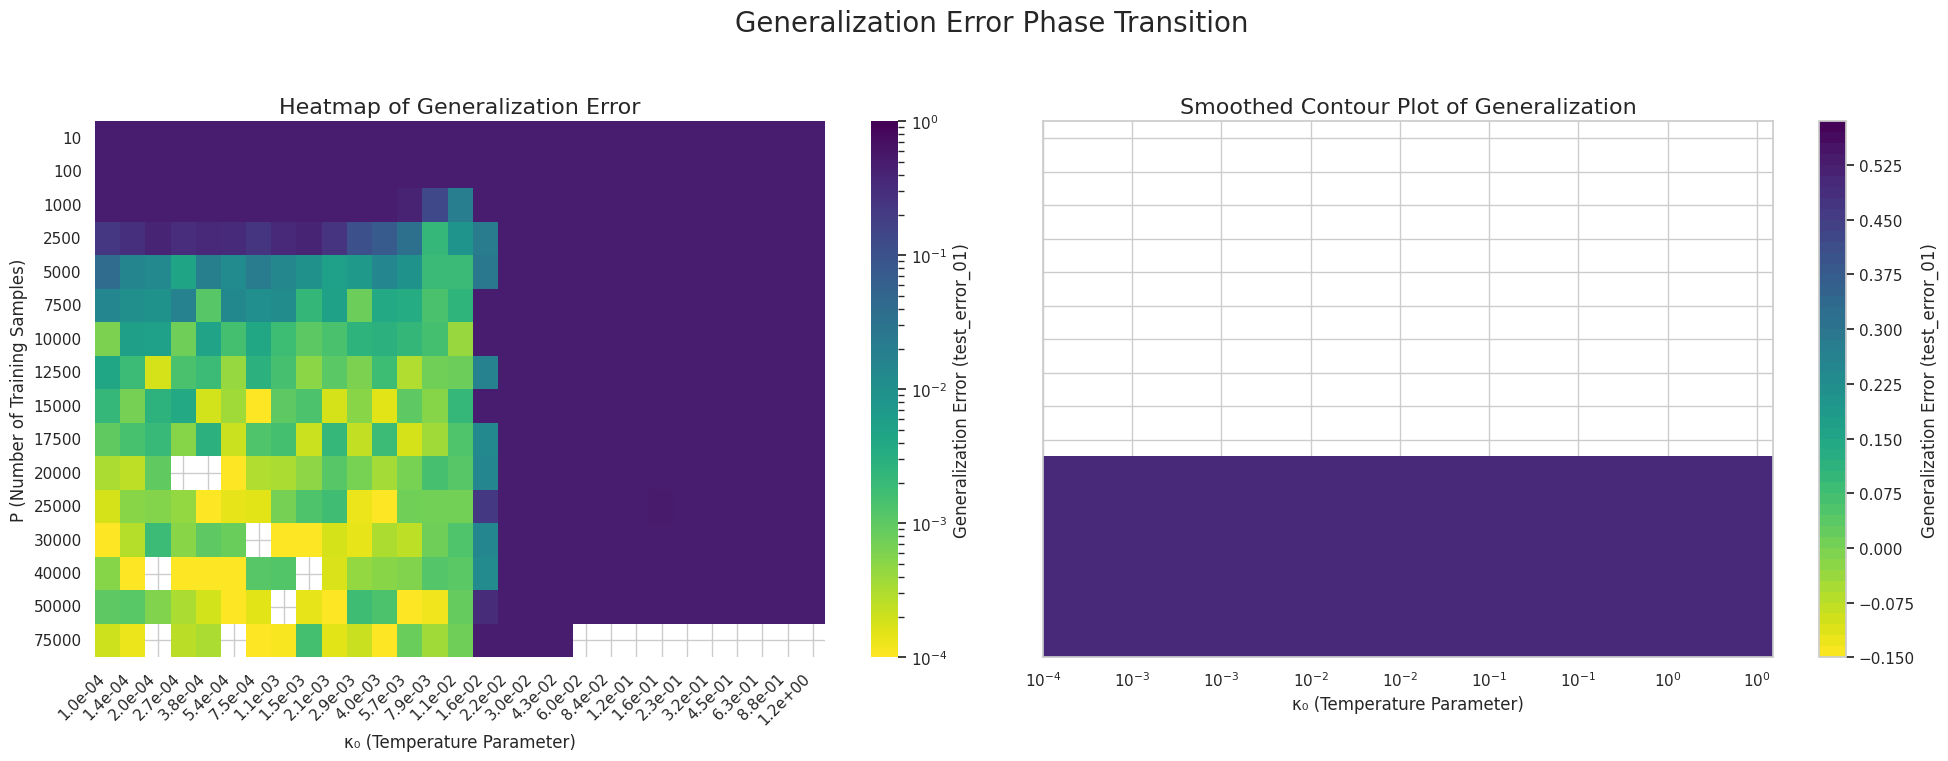

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatter, FuncFormatter
import seaborn as sns
from scipy.interpolate import griddata

def plot_phase_transition(json_path):
    """
    Loads experiment results from a JSON file and creates two plots:
    1. A direct heatmap of the generalization error.
    2. A smoothed contour plot to visualize the phase transition.

    Args:
        json_path (str or Path): The path to the training_results.json file.
    """
    # --- 1. Load and Preprocess Data ---
    try:
        with open(json_path, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file was not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode the JSON file. It might be empty or corrupted.")
        return

    if not results:
        print("The results file is empty. No data to plot.")
        return
        
    # Convert to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(results)

    # Ensure required columns exist
    required_cols = {'P', 'kappa_0', 'test_error_01'}
    if not required_cols.issubset(df.columns):
        print(f"Error: The JSON file must contain the columns: {required_cols}")
        return

    # Drop any rows with NaN values in the test error (from diverged runs)
    df.dropna(subset=['test_error_01'], inplace=True)
    
    # --- 2. Create Plots ---
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle('Generalization Error Phase Transition', fontsize=20)

    # --- 3. Plot 1: Standard Heatmap ---
    try:
        # Pivot the data to create a grid for the heatmap
        heatmap_data = df.pivot(index='P', columns='kappa_0', values='test_error_01')
        # Sort columns to ensure kappa_0 is in order
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Use a perceptually uniform colormap
        cmap = "viridis_r" # _r reverses the map (lower is better)
        
        sns.heatmap(
            heatmap_data,
            ax=axes[0],
            cmap=cmap,
            cbar_kws={'label': 'Generalization Error (test_error_01)'},
            norm=mcolors.LogNorm(vmin=df['test_error_01'].min() + 1e-4, vmax=1.0) # Log color scale
        )
        axes[0].set_title('Heatmap of Generalization Error', fontsize=16)
        axes[0].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        axes[0].set_ylabel('P (Number of Training Samples)', fontsize=12)
        # Format x-axis ticks for better readability
        axes[0].set_xticklabels([f'{float(t.get_text()):.1e}' for t in axes[0].get_xticklabels()], rotation=45, ha='right')

    except Exception as e:
        axes[0].text(0.5, 0.5, f"Could not generate heatmap.\nError: {e}", ha='center', va='center')


    # --- 4. Plot 2: Smoothed Contour Plot ---
    try:
        # Prepare data points for interpolation
        # We use log of kappa for smoother interpolation in log space
        x = np.log10(df['kappa_0'])
        y = df['P']
        z = df['test_error_01']

        # Create a grid to interpolate onto
        xi = np.linspace(x.min(), x.max(), 200)
        yi = np.linspace(y.min(), y.max(), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate the data
        zi = griddata((x, y), z, (xi, yi), method='cubic')

        # Plot the filled contour
        contour = axes[1].contourf(xi, yi, zi, levels=50, cmap=cmap)
        axes[1].set_title('Smoothed Contour Plot of Generalization', fontsize=16)
        axes[1].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        
        # Format the x-axis to show original kappa values instead of log10
        def log_to_val(tick_val, pos):
            return f"$10^{{{int(tick_val)}}}$"
        
        formatter = FuncFormatter(log_to_val)
        axes[1].xaxis.set_major_formatter(formatter)

        # Add a color bar
        fig.colorbar(contour, ax=axes[1], label='Generalization Error (test_error_01)')

    except Exception as e:
        axes[1].text(0.5, 0.5, f"Could not generate contour plot.\nError: {e}", ha='center', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace this with the actual path to your results file
    results_file_path = '/home/goring/mean_field_langevin/Langevin_training/results/d30_k4_0708_grid/training_results.json'
    
    plot_phase_transition(results_file_path)



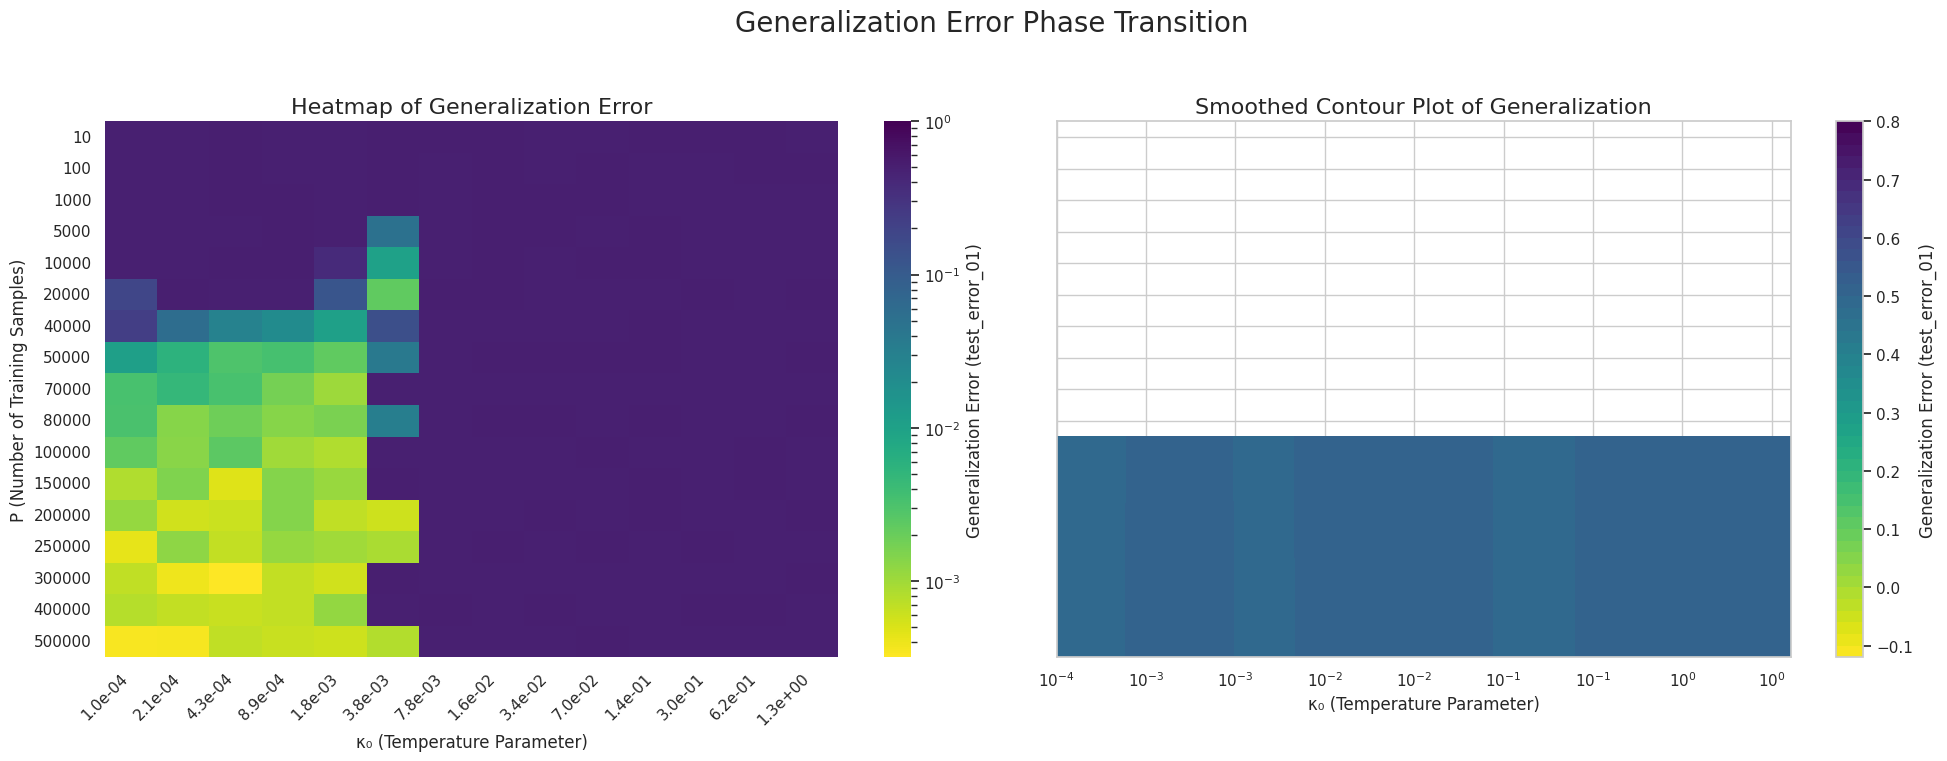

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatter, FuncFormatter
import seaborn as sns
from scipy.interpolate import griddata

def plot_phase_transition(json_path):
    """
    Loads experiment results from a JSON file and creates two plots:
    1. A direct heatmap of the generalization error.
    2. A smoothed contour plot to visualize the phase transition.

    Args:
        json_path (str or Path): The path to the training_results.json file.
    """
    # --- 1. Load and Preprocess Data ---
    try:
        with open(json_path, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file was not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode the JSON file. It might be empty or corrupted.")
        return

    if not results:
        print("The results file is empty. No data to plot.")
        return
        
    # Convert to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(results)

    # Ensure required columns exist
    required_cols = {'P', 'kappa_0', 'test_error_01'}
    if not required_cols.issubset(df.columns):
        print(f"Error: The JSON file must contain the columns: {required_cols}")
        return

    # Drop any rows with NaN values in the test error (from diverged runs)
    df.dropna(subset=['test_error_01'], inplace=True)
    
    # --- 2. Create Plots ---
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle('Generalization Error Phase Transition', fontsize=20)

    # --- 3. Plot 1: Standard Heatmap ---
    try:
        # Pivot the data to create a grid for the heatmap
        heatmap_data = df.pivot(index='P', columns='kappa_0', values='test_error_01')
        # Sort columns to ensure kappa_0 is in order
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Use a perceptually uniform colormap
        cmap = "viridis_r" # _r reverses the map (lower is better)
        
        sns.heatmap(
            heatmap_data,
            ax=axes[0],
            cmap=cmap,
            cbar_kws={'label': 'Generalization Error (test_error_01)'},
            norm=mcolors.LogNorm(vmin=df['test_error_01'].min() + 1e-4, vmax=1.0) # Log color scale
        )
        axes[0].set_title('Heatmap of Generalization Error', fontsize=16)
        axes[0].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        axes[0].set_ylabel('P (Number of Training Samples)', fontsize=12)
        # Format x-axis ticks for better readability
        axes[0].set_xticklabels([f'{float(t.get_text()):.1e}' for t in axes[0].get_xticklabels()], rotation=45, ha='right')

    except Exception as e:
        axes[0].text(0.5, 0.5, f"Could not generate heatmap.\nError: {e}", ha='center', va='center')


    # --- 4. Plot 2: Smoothed Contour Plot ---
    try:
        # Prepare data points for interpolation
        # We use log of kappa for smoother interpolation in log space
        x = np.log10(df['kappa_0'])
        y = df['P']
        z = df['test_error_01']

        # Create a grid to interpolate onto
        xi = np.linspace(x.min(), x.max(), 200)
        yi = np.linspace(y.min(), y.max(), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate the data
        zi = griddata((x, y), z, (xi, yi), method='cubic')

        # Plot the filled contour
        contour = axes[1].contourf(xi, yi, zi, levels=50, cmap=cmap)
        axes[1].set_title('Smoothed Contour Plot of Generalization', fontsize=16)
        axes[1].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        
        # Format the x-axis to show original kappa values instead of log10
        def log_to_val(tick_val, pos):
            return f"$10^{{{int(tick_val)}}}$"
        
        formatter = FuncFormatter(log_to_val)
        axes[1].xaxis.set_major_formatter(formatter)

        # Add a color bar
        fig.colorbar(contour, ax=axes[1], label='Generalization Error (test_error_01)')

    except Exception as e:
        axes[1].text(0.5, 0.5, f"Could not generate contour plot.\nError: {e}", ha='center', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace this with the actual path to your results file
    results_file_path = '/home/goring/mean_field_langevin/Langevin_training/results/d40_k6_0208_grid/training_results.json'
    
    plot_phase_transition(results_file_path)



/tmp/ipykernel_2753304/3975938830.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(P_vals))


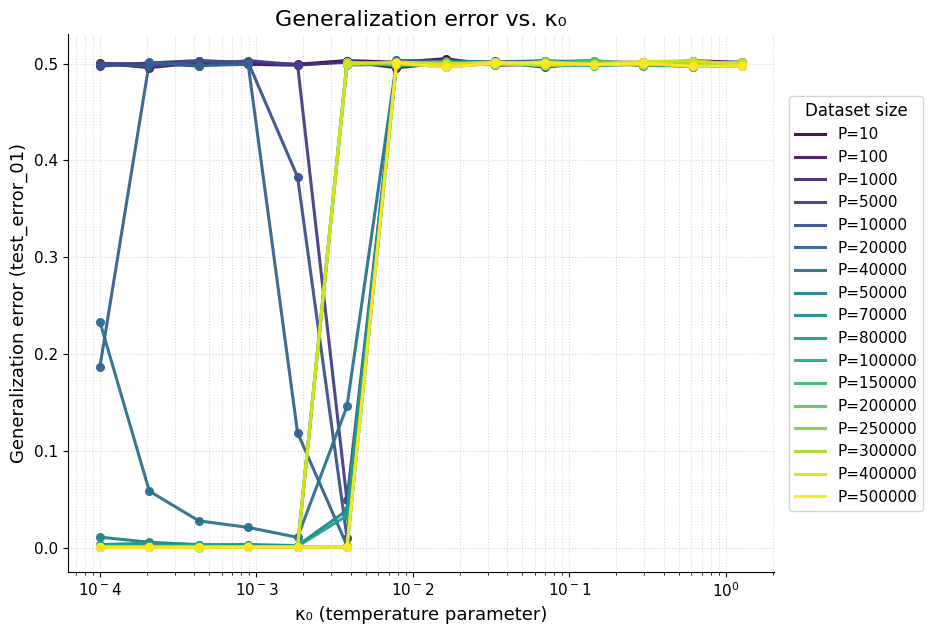

In [15]:
# --- set your path here ---
RESULTS_FILE  = '/home/goring/mean_field_langevin/Langevin_training/results/d40_k6_0208_grid/training_results.json'


import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_err_vs_kappa_lines(json_path,
                            logx=True,
                            logy=False,
                            cmap_name='viridis',
                            linewidth=2.0,
                            markersize=5,
                            alpha=0.95):
    # Load
    with open(json_path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    needed = {'P','kappa_0','test_error_01'}
    if not needed.issubset(df.columns):
        raise ValueError(f"Missing columns. Need {needed}")

    # Clean + average duplicates at identical (P, kappa_0)
    df = (df[['P','kappa_0','test_error_01']]
          .dropna(subset=['test_error_01'])
          .groupby(['P','kappa_0'], as_index=False)
          .agg(test_error_01=('test_error_01','mean')))
    df['P'] = df['P'].astype(float)
    df['kappa_0'] = df['kappa_0'].astype(float)
    df['test_error_01'] = df['test_error_01'].astype(float)

    # Ensure kappa > 0 for log-x
    if logx and (df['kappa_0'] <= 0).any():
        raise ValueError("kappa_0 must be > 0 when logx=True.")

    # Unique P values and colormap
    P_vals = np.sort(df['P'].unique())
    cmap = plt.cm.get_cmap(cmap_name, len(P_vals))

    # ICML-ish minimalist style
    plt.rcParams.update({
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 16,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
    })

    fig, ax = plt.subplots(figsize=(9.5, 6.5))

    for i, P in enumerate(P_vals):
        sub = df[df['P'] == P].sort_values('kappa_0')
        x = sub['kappa_0'].values
        y = sub['test_error_01'].values

        color = cmap(i)
        label = f"P={int(P) if float(P).is_integer() else P:g}"

        # line + markers (no smoothing)
        ax.plot(x, y, '-', color=color, linewidth=linewidth, alpha=alpha, label=label)
        ax.plot(x, y, 'o', color=color, markersize=markersize, alpha=alpha)

    # Axes scales
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel('κ₀ (temperature parameter)')
    ax.set_ylabel('Generalization error (test_error_01)')
    ax.set_title('Generalization error vs. κ₀')

    # Pretty 10^n ticks on x if logx
    if logx:
        def log_to_tex(val, pos):
            try:
                p = int(np.round(np.log10(val)))
                if np.isclose(10**p, val):
                    return rf"$10^{p}$"
            except Exception:
                pass
            return ""
        ax.xaxis.set_major_formatter(FuncFormatter(log_to_tex))

    # Grid + clean spines
    ax.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.5)
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    # Legend (outside right)
    ax.legend(title="Dataset size", loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

    plt.tight_layout()
    plt.show()

# run it
plot_err_vs_kappa_lines(
    RESULTS_FILE,
    logx=True,   # set False for linear x
    logy=False,  # set True if you want log y
    cmap_name='viridis',
    linewidth=2.2,
    markersize=5.5,
    alpha=0.95
)


/tmp/ipykernel_2682670/621327675.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(P_vals))


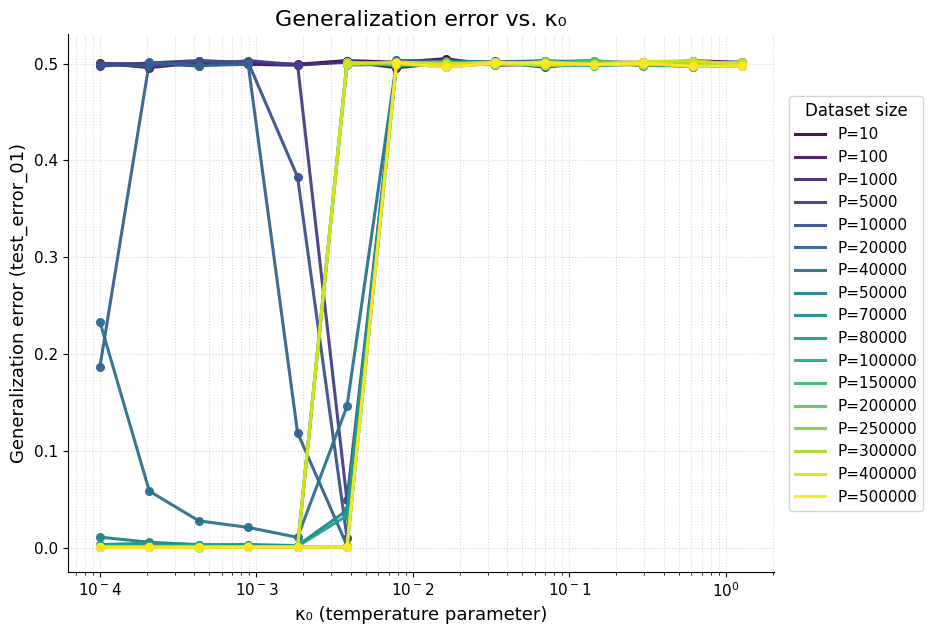

In [1]:
# --- set your path here ---
RESULTS_FILE = '/home/goring/mean_field_langevin/Langevin_training/results/d40_k6_0208_grid/training_results.json'

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_err_vs_kappa_lines(json_path,
                            logx=True,
                            logy=False,
                            cmap_name='viridis',
                            linewidth=2.0,
                            markersize=5,
                            alpha=0.95):
    # Load
    with open(json_path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    needed = {'P','kappa_0','test_error_01'}
    if not needed.issubset(df.columns):
        raise ValueError(f"Missing columns. Need {needed}")

    # Clean + average duplicates at identical (P, kappa_0)
    df = (df[['P','kappa_0','test_error_01']]
          .dropna(subset=['test_error_01'])
          .groupby(['P','kappa_0'], as_index=False)
          .agg(test_error_01=('test_error_01','mean')))
    df['P'] = df['P'].astype(float)
    df['kappa_0'] = df['kappa_0'].astype(float)
    df['test_error_01'] = df['test_error_01'].astype(float)

    # Ensure kappa > 0 for log-x
    if logx and (df['kappa_0'] <= 0).any():
        raise ValueError("kappa_0 must be > 0 when logx=True.")

    # Unique P values and colormap
    P_vals = np.sort(df['P'].unique())
    cmap = plt.cm.get_cmap(cmap_name, len(P_vals))

    # ICML-ish minimalist style
    plt.rcParams.update({
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 16,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
    })

    fig, ax = plt.subplots(figsize=(9.5, 6.5))

    for i, P in enumerate(P_vals):
        sub = df[df['P'] == P].sort_values('kappa_0')
        x = sub['kappa_0'].values
        y = sub['test_error_01'].values

        color = cmap(i)
        label = f"P={int(P) if float(P).is_integer() else P:g}"

        # line + markers (no smoothing)
        ax.plot(x, y, '-', color=color, linewidth=linewidth, alpha=alpha, label=label)
        ax.plot(x, y, 'o', color=color, markersize=markersize, alpha=alpha)

    # Axes scales
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel('κ₀ (temperature parameter)')
    ax.set_ylabel('Generalization error (test_error_01)')
    ax.set_title('Generalization error vs. κ₀')

    # Pretty 10^n ticks on x if logx
    if logx:
        def log_to_tex(val, pos):
            try:
                p = int(np.round(np.log10(val)))
                if np.isclose(10**p, val):
                    return rf"$10^{p}$"
            except Exception:
                pass
            return ""
        ax.xaxis.set_major_formatter(FuncFormatter(log_to_tex))

    # Grid + clean spines
    ax.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.5)
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    # Legend (outside right)
    ax.legend(title="Dataset size", loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

    plt.tight_layout()
    plt.show()

# run it
plot_err_vs_kappa_lines(
    RESULTS_FILE,
    logx=True,   # set False for linear x
    logy=False,  # set True if you want log y
    cmap_name='viridis',
    linewidth=2.2,
    markersize=5.5,
    alpha=0.95
)


In [ ]:
###### new plots

Loaded 103 rows


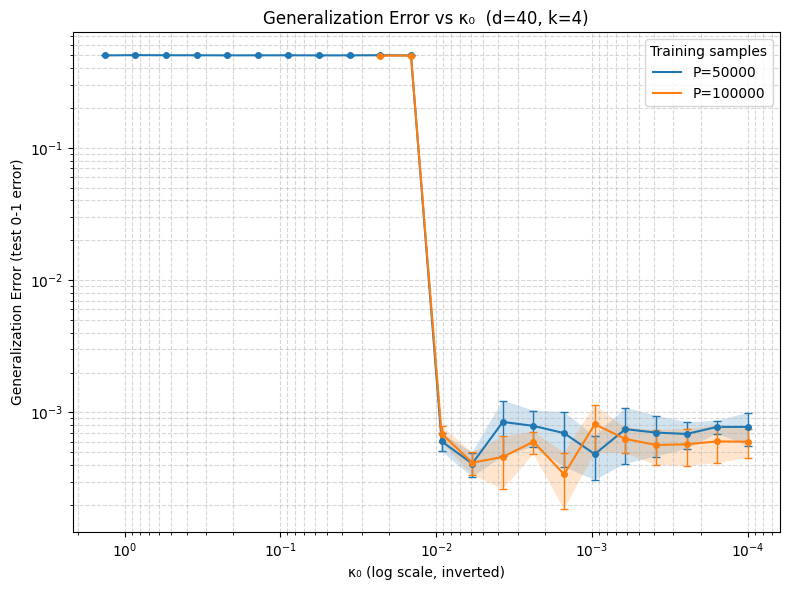

In [3]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- set this to your results root directory ---
base_save_dir = Path("/home/goring/mean_field_langevin/Langevin_training/results/d40_k4_1708_grid")

def load_results(base_dir: Path) -> pd.DataFrame:
    rows = []
    for sub in base_dir.glob("d*_k*"):
        f = sub / "training_results.json"
        if not f.exists():
            continue
        try:
            with open(f, "r") as fh:
                data = json.load(fh)
            rows.extend(data)
        except json.JSONDecodeError:
            print(f"⚠️ Could not parse {f}")
    df = pd.DataFrame(rows)
    if df.empty:
        print("No results found.")
        return df
    # ensure numeric types
    for col in ["d", "k", "P"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    for col in ["kappa_0", "test_error_01"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    # drop rows without needed fields
    df = df.dropna(subset=["d", "k", "P", "kappa_0", "test_error_01"])
    # guard against floating-grouping quirks by rounding kappa_0
    df["kappa_rounded"] = df["kappa_0"].round(12)
    return df

def plot_generalization(df: pd.DataFrame):
    if df.empty:
        return
    for (d, k), df_sub in df.groupby(["d", "k"]):
        fig, ax = plt.subplots(figsize=(8, 6))

        for P, df_p in df_sub.groupby("P"):
            # aggregate across exp_id at each kappa
            grp = df_p.groupby("kappa_rounded")["test_error_01"]
            means = grp.mean().rename("mean")
            stds  = grp.std(ddof=1).rename("std")       # sample std
            ns    = grp.count().rename("n")
            sems  = (stds / np.sqrt(ns)).rename("sem")  # standard error of the mean

            agg = pd.concat([means, stds, sems], axis=1).reset_index()
            # sort by kappa increasing (we'll invert axis after)
            agg = agg.sort_values("kappa_rounded")

            # line
            (line,) = ax.plot(agg["kappa_rounded"].to_numpy(),
                              agg["mean"].to_numpy(),
                              label=f"P={int(P)}")
            color = line.get_color()

            # ribbon: mean ± 1 SEM
            upper = agg["mean"] + agg["sem"].fillna(0)
            lower = agg["mean"] - agg["sem"].fillna(0)
            ax.fill_between(agg["kappa_rounded"].to_numpy(),
                            lower.to_numpy(),
                            upper.to_numpy(),
                            alpha=0.2)

            # points with vertical error bars (SEM)
            ax.errorbar(agg["kappa_rounded"].to_numpy(),
                        agg["mean"].to_numpy(),
                        yerr=agg["sem"].fillna(0).to_numpy(),
                        fmt="o", ms=4, lw=1, capsize=3, color=color, ecolor=color)

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.invert_xaxis()  # invert x-axis as requested
        ax.set_xlabel("κ₀ (log scale, inverted)")
        ax.set_ylabel("Generalization Error (test 0-1 error)")
        ax.set_title(f"Generalization Error vs κ₀  (d={int(d)}, k={int(k)})")
        ax.grid(True, which="both", ls="--", alpha=0.5)
        ax.legend(title="Training samples")
        plt.tight_layout()
        plt.show()

df = load_results(base_save_dir)
print(f"Loaded {len(df)} rows")
plot_generalization(df)


Loaded 5 rows


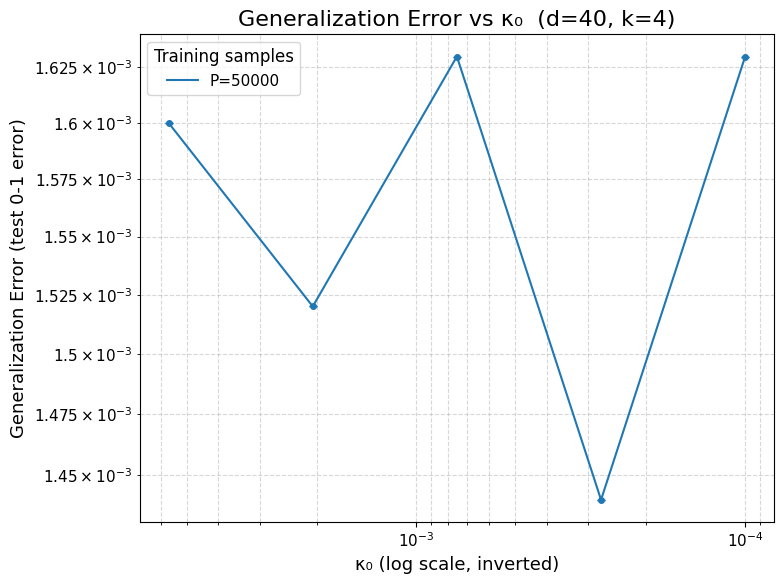

In [21]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- set this to your results root directory ---
base_save_dir = Path("/home/goring/mean_field_langevin/Langevin_training/results/d40_k4_eta5e-6_2")

def load_results(base_dir: Path) -> pd.DataFrame:
    rows = []
    for sub in base_dir.glob("d*_k*"):
        f = sub / "training_results.json"
        if not f.exists():
            continue
        try:
            with open(f, "r") as fh:
                data = json.load(fh)
            rows.extend(data)
        except json.JSONDecodeError:
            print(f"⚠️ Could not parse {f}")
    df = pd.DataFrame(rows)
    if df.empty:
        print("No results found.")
        return df
    # ensure numeric types
    for col in ["d", "k", "P"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    for col in ["kappa_0", "test_error_01"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    # drop rows without needed fields
    df = df.dropna(subset=["d", "k", "P", "kappa_0", "test_error_01"])
    # guard against floating-grouping quirks by rounding kappa_0
    df["kappa_rounded"] = df["kappa_0"].round(12)
    return df

def plot_generalization(df: pd.DataFrame):
    if df.empty:
        return
    for (d, k), df_sub in df.groupby(["d", "k"]):
        fig, ax = plt.subplots(figsize=(8, 6))

        for P, df_p in df_sub.groupby("P"):
            # aggregate across exp_id at each kappa
            grp = df_p.groupby("kappa_rounded")["test_error_01"]
            means = grp.mean().rename("mean")
            stds  = grp.std(ddof=1).rename("std")       # sample std
            ns    = grp.count().rename("n")
            sems  = (stds / np.sqrt(ns)).rename("sem")  # standard error of the mean

            agg = pd.concat([means, stds, sems], axis=1).reset_index()
            # sort by kappa increasing (we'll invert axis after)
            agg = agg.sort_values("kappa_rounded")

            # line
            (line,) = ax.plot(agg["kappa_rounded"].to_numpy(),
                              agg["mean"].to_numpy(),
                              label=f"P={int(P)}")
            color = line.get_color()

            # ribbon: mean ± 1 SEM
            upper = agg["mean"] + agg["sem"].fillna(0)
            lower = agg["mean"] - agg["sem"].fillna(0)
            ax.fill_between(agg["kappa_rounded"].to_numpy(),
                            lower.to_numpy(),
                            upper.to_numpy(),
                            alpha=0.2)

            # points with vertical error bars (SEM)
            ax.errorbar(agg["kappa_rounded"].to_numpy(),
                        agg["mean"].to_numpy(),
                        yerr=agg["sem"].fillna(0).to_numpy(),
                        fmt="o", ms=4, lw=1, capsize=3, color=color, ecolor=color)

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.invert_xaxis()  # invert x-axis as requested
        ax.set_xlabel("κ₀ (log scale, inverted)")
        ax.set_ylabel("Generalization Error (test 0-1 error)")
        ax.set_title(f"Generalization Error vs κ₀  (d={int(d)}, k={int(k)})")
        ax.grid(True, which="both", ls="--", alpha=0.5)
        ax.legend(title="Training samples")
        plt.tight_layout()
        plt.show()

df = load_results(base_save_dir)
print(f"Loaded {len(df)} rows")
plot_generalization(df)


Loaded 27 rows


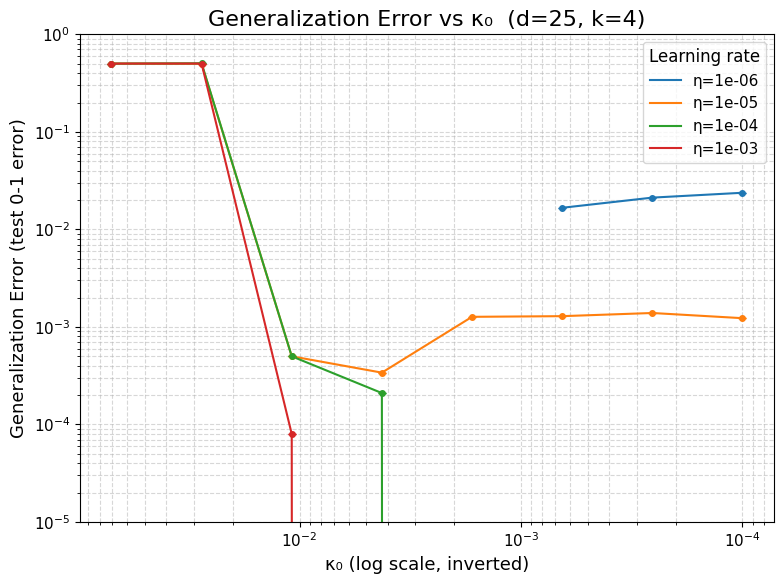

In [4]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- set this to your results root directory ---
base_save_dir = Path("/home/goring/mean_field_langevin/Langevin_training/results/d25_k4_1908_lrgrid")

def load_results(base_dir: Path) -> pd.DataFrame:
    rows = []
    for sub in base_dir.glob("d*_k*"):
        f = sub / "training_results.json"
        if not f.exists():
            continue
        try:
            with open(f, "r") as fh:
                data = json.load(fh)
            rows.extend(data)
        except json.JSONDecodeError:
            print(f"⚠️ Could not parse {f}")
    df = pd.DataFrame(rows)
    if df.empty:
        print("No results found.")
        return df

    # ensure numeric types
    for col in ["d", "k", "P", "kappa_0", "test_error_01", "eta"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # drop rows without needed fields
    needed = ["d", "k", "P", "kappa_0", "test_error_01", "eta"]
    df = df.dropna(subset=[c for c in needed if c in df.columns])

    # guard against floating-grouping quirks
    df["kappa_rounded"] = df["kappa_0"].round(12)
    df["eta_rounded"]   = df["eta"].round(12)

    return df

def plot_generalization_by_eta(df: pd.DataFrame):
    if df.empty:
        return
    for (d, k), df_sub in df.groupby(["d", "k"]):
        fig, ax = plt.subplots(figsize=(8, 6))

        # iterate over learning rates (sorted ascending)
        for eta_key, df_eta in sorted(df_sub.groupby("eta_rounded"), key=lambda t: t[0]):
            # aggregate across exp_id (and anything else) at each kappa
            grp  = df_eta.groupby("kappa_rounded")["test_error_01"]
            means = grp.mean().rename("mean")
            stds  = grp.std(ddof=1).rename("std")
            ns    = grp.count().rename("n")
            sems  = (stds / np.sqrt(ns)).rename("sem")

            agg = pd.concat([means, stds, sems], axis=1).reset_index()
            agg = agg.sort_values("kappa_rounded")

            # line
            (line,) = ax.plot(
                agg["kappa_rounded"].to_numpy(),
                agg["mean"].to_numpy(),
                label=f"η={df_eta['eta'].iloc[0]:.0e}"
            )
            color = line.get_color()

            # ribbon: mean ± 1 SEM
            upper = agg["mean"] + agg["sem"].fillna(0)
            lower = agg["mean"] - agg["sem"].fillna(0)
            ax.fill_between(
                agg["kappa_rounded"].to_numpy(),
                lower.to_numpy(),
                upper.to_numpy(),
                alpha=0.2, facecolor=color
            )

            # points with vertical error bars (SEM)
            ax.errorbar(
                agg["kappa_rounded"].to_numpy(),
                agg["mean"].to_numpy(),
                yerr=agg["sem"].fillna(0).to_numpy(),
                fmt="o", ms=4, lw=1, capsize=3, color=color, ecolor=color
            )

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim(1e-5, 1.0)  # set y-limits for better visibility
        ax.invert_xaxis()  # invert x-axis as requested
        ax.set_xlabel("κ₀ (log scale, inverted)")
        ax.set_ylabel("Generalization Error (test 0-1 error)")
        ax.set_title(f"Generalization Error vs κ₀  (d={int(d)}, k={int(k)})")
        ax.grid(True, which="both", ls="--", alpha=0.5)
        ax.legend(title="Learning rate")
        plt.tight_layout()
        plt.show()

df = load_results(base_save_dir)
print(f"Loaded {len(df)} rows")
plot_generalization_by_eta(df)


/tmp/ipykernel_3078509/3474751548.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(P_vals))


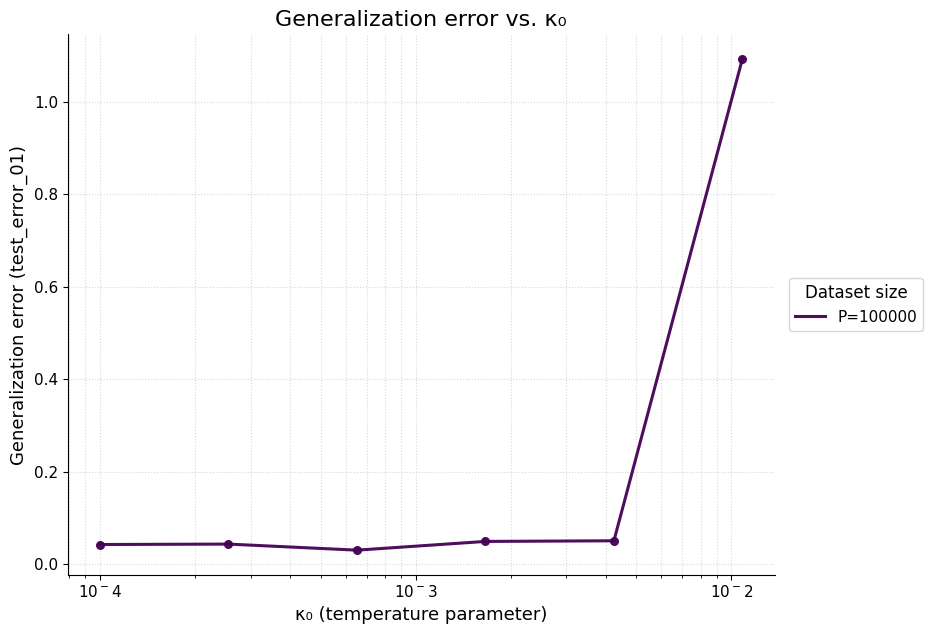

In [3]:
# --- set your path here ---
RESULTS_FILE = '/home/goring/mean_field_langevin/Langevin_training/results/20_08_target48/d30_expr_S0_MINUS_3_PLUS_S0_MINUS_7/training_results.json'

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_err_vs_kappa_lines(json_path,
                            logx=True,
                            logy=False,
                            cmap_name='viridis',
                            linewidth=2.0,
                            markersize=5,
                            alpha=0.95):
    # Load
    with open(json_path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    needed = {'P','kappa_0','test_mse'}
    if not needed.issubset(df.columns):
        raise ValueError(f"Missing columns. Need {needed}")

    # Clean + average duplicates at identical (P, kappa_0)
    df = (df[['P','kappa_0','test_mse']]
          .dropna(subset=['test_mse'])
          .groupby(['P','kappa_0'], as_index=False)
          .agg(test_mse=('test_mse','mean')))
    df['P'] = df['P'].astype(float)
    df['kappa_0'] = df['kappa_0'].astype(float)
    df['test_mse'] = df['test_mse'].astype(float)

    # Ensure kappa > 0 for log-x
    if logx and (df['kappa_0'] <= 0).any():
        raise ValueError("kappa_0 must be > 0 when logx=True.")

    # Unique P values and colormap
    P_vals = np.sort(df['P'].unique())
    cmap = plt.cm.get_cmap(cmap_name, len(P_vals))

    # ICML-ish minimalist style
    plt.rcParams.update({
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 16,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
    })

    fig, ax = plt.subplots(figsize=(9.5, 6.5))

    for i, P in enumerate(P_vals):
        sub = df[df['P'] == P].sort_values('kappa_0')
        x = sub['kappa_0'].values
        y = sub['test_mse'].values

        color = cmap(i)
        label = f"P={int(P) if float(P).is_integer() else P:g}"

        # line + markers (no smoothing)
        ax.plot(x, y, '-', color=color, linewidth=linewidth, alpha=alpha, label=label)
        ax.plot(x, y, 'o', color=color, markersize=markersize, alpha=alpha)

    # Axes scales
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel('κ₀ (temperature parameter)')
    ax.set_ylabel('Generalization error (test_error_01)')
    ax.set_title('Generalization error vs. κ₀')

    # Pretty 10^n ticks on x if logx
    if logx:
        def log_to_tex(val, pos):
            try:
                p = int(np.round(np.log10(val)))
                if np.isclose(10**p, val):
                    return rf"$10^{p}$"
            except Exception:
                pass
            return ""
        ax.xaxis.set_major_formatter(FuncFormatter(log_to_tex))

    # Grid + clean spines
    ax.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.5)
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    # Legend (outside right)
    ax.legend(title="Dataset size", loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

    plt.tight_layout()
    plt.show()

# run it
plot_err_vs_kappa_lines(
    RESULTS_FILE,
    logx=True,   # set False for linear x
    logy=False,  # set True if you want log y
    cmap_name='viridis',
    linewidth=2.2,
    markersize=5.5,
    alpha=0.95
)


Loaded 6 rows


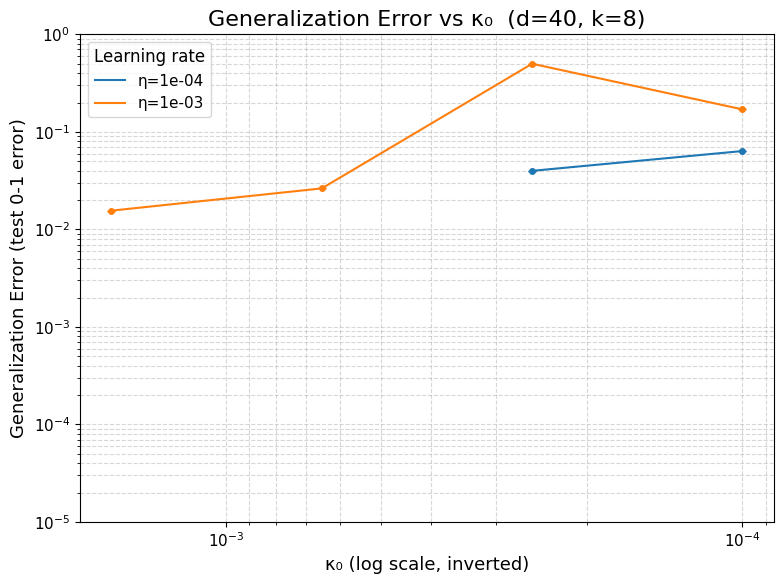

In [5]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- set this to your results root directory ---
base_save_dir = Path("/home/goring/mean_field_langevin/Langevin_training/results/d40_k8_1908_lrgrid")

def load_results(base_dir: Path) -> pd.DataFrame:
    rows = []
    for sub in base_dir.glob("d*_k*"):
        f = sub / "training_results.json"
        if not f.exists():
            continue
        try:
            with open(f, "r") as fh:
                data = json.load(fh)
            rows.extend(data)
        except json.JSONDecodeError:
            print(f"⚠️ Could not parse {f}")
    df = pd.DataFrame(rows)
    if df.empty:
        print("No results found.")
        return df

    # ensure numeric types
    for col in ["d", "k", "P", "kappa_0", "test_error_01", "eta"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # drop rows without needed fields
    needed = ["d", "k", "P", "kappa_0", "test_error_01", "eta"]
    df = df.dropna(subset=[c for c in needed if c in df.columns])

    # guard against floating-grouping quirks
    df["kappa_rounded"] = df["kappa_0"].round(12)
    df["eta_rounded"]   = df["eta"].round(12)

    return df

def plot_generalization_by_eta(df: pd.DataFrame):
    if df.empty:
        return
    for (d, k), df_sub in df.groupby(["d", "k"]):
        fig, ax = plt.subplots(figsize=(8, 6))

        # iterate over learning rates (sorted ascending)
        for eta_key, df_eta in sorted(df_sub.groupby("eta_rounded"), key=lambda t: t[0]):
            # aggregate across exp_id (and anything else) at each kappa
            grp  = df_eta.groupby("kappa_rounded")["test_error_01"]
            means = grp.mean().rename("mean")
            stds  = grp.std(ddof=1).rename("std")
            ns    = grp.count().rename("n")
            sems  = (stds / np.sqrt(ns)).rename("sem")

            agg = pd.concat([means, stds, sems], axis=1).reset_index()
            agg = agg.sort_values("kappa_rounded")

            # line
            (line,) = ax.plot(
                agg["kappa_rounded"].to_numpy(),
                agg["mean"].to_numpy(),
                label=f"η={df_eta['eta'].iloc[0]:.0e}"
            )
            color = line.get_color()

            # ribbon: mean ± 1 SEM
            upper = agg["mean"] + agg["sem"].fillna(0)
            lower = agg["mean"] - agg["sem"].fillna(0)
            ax.fill_between(
                agg["kappa_rounded"].to_numpy(),
                lower.to_numpy(),
                upper.to_numpy(),
                alpha=0.2, facecolor=color
            )

            # points with vertical error bars (SEM)
            ax.errorbar(
                agg["kappa_rounded"].to_numpy(),
                agg["mean"].to_numpy(),
                yerr=agg["sem"].fillna(0).to_numpy(),
                fmt="o", ms=4, lw=1, capsize=3, color=color, ecolor=color
            )

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_ylim(1e-5, 1.0)  # set y-limits for better visibility
        ax.invert_xaxis()  # invert x-axis as requested
        ax.set_xlabel("κ₀ (log scale, inverted)")
        ax.set_ylabel("Generalization Error (test 0-1 error)")
        ax.set_title(f"Generalization Error vs κ₀  (d={int(d)}, k={int(k)})")
        ax.grid(True, which="both", ls="--", alpha=0.5)
        ax.legend(title="Learning rate")
        plt.tight_layout()
        plt.show()

df = load_results(base_save_dir)
print(f"Loaded {len(df)} rows")
plot_generalization_by_eta(df)


In [1]:
# Generalization Error vs P (color-coded by kappa_0)
#
# Paste this cell into a Jupyter notebook. Then call `plot_generalization_vs_P(...)`
# with either:
#   - a path to a single `training_results.json` file, OR
#   - a directory that contains one or more `training_results.json` files (recursively), OR
#   - a Python list of dicts (already-loaded JSON), OR
#   - a pandas DataFrame with the expected columns.
#
# Example (directory of JSON files):
#   fig, agg = plot_generalization_vs_P(
#       "/home/goring/mean_field_langevin/Langevin_training/results/d25_k4_2208_grid",
#       metric="test_error_01",
#       save_path="/mnt/data/generalization_vs_P.png",
#   )
#   fig.show()
#   # Download saved image (if you provided save_path above):
#   # /mnt/data/generalization_vs_P.png
#
# Notes:
# - Uses matplotlib only (no seaborn), with the default color cycle to color-code kappa_0.
# - Aggregates replicates (exp_id) by mean and draws 95% CI error bars.
# - Filters out entries where `status != "trained"` or metric is missing/NaN.
# - If you pass a directory, all nested `training_results.json` files will be merged.
#
# Required columns in the input JSON/DF:
#   P (int), kappa_0 (float), test_error_01 (float)  [metric can be customized]
#
# Optional but nice-to-have columns (used for titles/filters if uniform): d, k, eta.
#
from pathlib import Path
import json
from typing import Any, Iterable, Optional, Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def _load_json_listfile(json_path: Union[str, Path]) -> list[dict]:
    """Load a JSON file expected to contain a list of dicts. Returns [] on errors."""
    json_path = Path(json_path)
    try:
        with open(json_path, "r") as f:
            data = json.load(f)
        if isinstance(data, list):
            return data
        elif isinstance(data, dict):
            # Some users might accidentally save a dict keyed by run-id; coerce to list of values.
            return list(data.values())
        else:
            return []
    except Exception:
        return []


def _gather_results_from_dir(root: Union[str, Path]) -> list[dict]:
    """Recursively find and read all 'training_results.json' files under root."""
    root = Path(root)
    out: list[dict] = []
    if not root.exists():
        return out
    for p in root.rglob("training_results.json"):
        out.extend(_load_json_listfile(p))
    return out


def results_to_dataframe(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
) -> pd.DataFrame:
    """
    Normalize various inputs to a clean DataFrame.

    Accepts:
      - path to a JSON file (list of dicts);
      - path to a directory (recursively reads any 'training_results.json');
      - an iterable of dicts;
      - a pandas DataFrame.
    """
    if isinstance(source, (str, Path)):
        p = Path(source)
        if p.is_file():
            rows = _load_json_listfile(p)
            df = pd.DataFrame(rows)
        elif p.is_dir():
            rows = _gather_results_from_dir(p)
            df = pd.DataFrame(rows)
        else:
            raise FileNotFoundError(f"Path not found: {p}")
    elif isinstance(source, pd.DataFrame):
        df = source.copy()
    else:
        # Assume iterable of dicts
        df = pd.DataFrame(list(source))

    # Basic cleanup / typing
    # Keep only columns we care about if present
    wanted = [
        "P",
        "kappa_0",
        "test_error_01",
        "train_error_01",
        "eta",
        "d",
        "k",
        "exp_id",
        "status",
    ]
    existing = [c for c in wanted if c in df.columns]
    df = df[existing].copy()

    # Cast types when possible
    for col in ["P", "d", "k", "exp_id"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")
    for col in ["kappa_0", "test_error_01", "train_error_01", "eta"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Filter to trained runs and drop missing metric rows (we'll also filter later)
    if "status" in df.columns:
        df = df[df["status"] == "trained"].copy()

    return df.reset_index(drop=True)


def aggregate_runs(
    df: pd.DataFrame,
    metric: str = "test_error_01",
) -> pd.DataFrame:
    """
    Compute mean, std, count, and 95% CI for `metric` over replicates grouped by (kappa_0, P).
    Returns a tidy DataFrame with columns:
        kappa_0, P, mean, std, n, ci95
    """
    if metric not in df.columns:
        raise KeyError(f"Metric column '{metric}' not found in DataFrame.")

    work = df.dropna(subset=[metric, "P", "kappa_0"]).copy()
    work["P"] = work["P"].astype(float)  # in case of Int64
    work["kappa_0"] = work["kappa_0"].astype(float)

    g = (
        work.groupby(["kappa_0", "P"], as_index=False)[metric]
        .agg(["mean", "std", "count"])
        .reset_index()
        .rename(columns={"count": "n"})
    )
    # 95% CI using normal approximation
    g["ci95"] = 1.96 * (g["std"] / np.sqrt(g["n"].clip(lower=1)))
    # Ensure sorting by P within each kappa
    g = g.sort_values(by=["kappa_0", "P"]).reset_index(drop=True)
    return g[["kappa_0", "P", "mean", "std", "n", "ci95"]]


def plot_generalization_vs_P(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
    metric: str = "test_error_01",
    title: Optional[str] = None,
    log_x: bool = False,
    save_path: Optional[Union[str, Path]] = None,
    marker: str = "o",
    linewidth: float = 1.5,
    markersize: float = 5.0,
) -> Tuple[plt.Figure, pd.DataFrame]:
    """
    Load -> aggregate -> plot generalization error vs P, color-coded by kappa_0.

    Parameters
    ----------
    source : path/iterable/DF
        Data source (see `results_to_dataframe`).
    metric : str
        Which metric to plot (default 'test_error_01').
    title : str | None
        Optional custom chart title. If None, tries to build from uniform d/k/eta if present.
    log_x : bool
        Set True for a log-scaled x-axis.
    save_path : str | Path | None
        If provided, saves the figure here (e.g., '/mnt/data/generalization_vs_P.png').
    marker, linewidth, markersize : styling
        Basic styling knobs. Uses matplotlib defaults for colors.

    Returns
    -------
    (fig, agg_df) : (matplotlib.figure.Figure, pandas.DataFrame)
        The created figure and the aggregated data used for plotting.
    """
    df = results_to_dataframe(source)

    # Build a default title if not given and if these are uniform
    if title is None:
        parts = []
        for col, label in [("d", "d"), ("k", "k"), ("eta", "η")]:
            if col in df.columns and df[col].notna().any():
                uniq = pd.unique(df[col].dropna())
                if len(uniq) == 1:
                    val = uniq[0]
                    if col == "eta":
                        parts.append(f"{label}={val:.2e}")
                    else:
                        parts.append(f"{label}={int(val)}")
        if parts:
            title = "Generalization vs P (" + ", ".join(parts) + ")"
        else:
            title = "Generalization vs P"

    agg = aggregate_runs(df, metric=metric)

    # Start plotting
    fig = plt.figure(figsize=(8, 5), dpi=120)
    ax = plt.gca()

    # Plot each kappa_0 series with error bars using default color cycle
    for kappa_val, g in agg.groupby("kappa_0"):
        xs = g["P"].values
        ys = g["mean"].values
        yerr = g["ci95"].fillna(0.0).values  # no bar if single run
        ax.errorbar(
            xs,
            ys,
            yerr=yerr,
            fmt=f"-{marker}",
            linewidth=linewidth,
            markersize=markersize,
            capsize=3,
            label=f"κ₀={kappa_val:.2g}",
        )

    ax.set_xlabel("P (train set size)")
    ax.set_ylabel(f"{metric} (generalization error)")
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.4)
    if log_x:
        ax.set_xscale("log")
    ax.legend(title="kappa_0", loc="best")

    fig.tight_layout()

    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path, bbox_inches="tight")
        print(f"Saved figure to: {save_path}")

    return fig, agg


print(
    "✅ Ready.\n"
    "Use plot_generalization_vs_P(<path or data>, metric='test_error_01', save_path='/mnt/data/generalization_vs_P.png')\n"
    "to generate the chart. The function returns (fig, aggregated_dataframe)."
)


✅ Ready.
Use plot_generalization_vs_P(<path or data>, metric='test_error_01', save_path='/mnt/data/generalization_vs_P.png')
to generate the chart. The function returns (fig, aggregated_dataframe).


In [3]:
fig, agg = plot_generalization_vs_P(
    "/home/goring/mean_field_langevin/Langevin_training/results/d25_k4_2208_grid",
    metric="test_mse",
    save_path="",  # optional
)
fig.show() 


KeyError: "Metric column 'test_mse' not found in DataFrame."

In [14]:
# Generalization Error vs P (color-coded by kappa_0)
#
# Paste this cell into a Jupyter notebook. Then call `plot_generalization_vs_P(...)`
# with either:
#   - a path to a single `training_results.json` file, OR
#   - a directory that contains one or more `training_results.json` files (recursively), OR
#   - a Python list of dicts (already-loaded JSON), OR
#   - a pandas DataFrame with the expected columns.
#
# Example (directory of JSON files):
#   fig, agg = plot_generalization_vs_P(
#       "/home/goring/mean_field_langevin/Langevin_training/results/d25_k4_2208_grid",
#       metric="test_mse",                     # <-- works now
#       save_path="/mnt/data/generalization_vs_P.png",
#   )
#   fig.show()
#   # Download saved image (if you provided save_path above):
#   # /mnt/data/generalization_vs_P.png
#
# Notes:
# - Uses matplotlib only (no seaborn), with the default color cycle to color-code kappa_0.
# - Aggregates replicates (exp_id) by mean and draws 95% CI error bars.
# - Filters out entries where `status != "trained"` or metric is missing/NaN.
# - If you pass a directory, all nested `training_results.json` files will be merged.
#
# Required columns in the input JSON/DF:
#   P (int), kappa_0 (float), and the chosen metric column (e.g., test_error_01 or test_mse)
#
# Optional but nice-to-have columns (used for titles/filters if uniform): d, k, eta.
#
from pathlib import Path
import json
from typing import Any, Iterable, Optional, Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def _load_json_listfile(json_path: Union[str, Path]) -> list[dict]:
    """Load a JSON file expected to contain a list of dicts. Returns [] on errors."""
    json_path = Path(json_path)
    try:
        with open(json_path, "r") as f:
            data = json.load(f)
        if isinstance(data, list):
            return data
        elif isinstance(data, dict):
            # Some users might accidentally save a dict keyed by run-id; coerce to list of values.
            return list(data.values())
        else:
            return []
    except Exception:
        return []


def _gather_results_from_dir(root: Union[str, Path]) -> list[dict]:
    """Recursively find and read all 'training_results.json' files under root."""
    root = Path(root)
    out: list[dict] = []
    if not root.exists():
        return out
    for p in root.rglob("training_results.json"):
        out.extend(_load_json_listfile(p))
    return out


def results_to_dataframe(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
) -> pd.DataFrame:
    """
    Normalize various inputs to a clean DataFrame.

    Accepts:
      - path to a JSON file (list of dicts);
      - path to a directory (recursively reads any 'training_results.json');
      - an iterable of dicts;
      - a pandas DataFrame.
    """
    if isinstance(source, (str, Path)):
        p = Path(source)
        if p.is_file():
            rows = _load_json_listfile(p)
            df = pd.DataFrame(rows)
        elif p.is_dir():
            rows = _gather_results_from_dir(p)
            df = pd.DataFrame(rows)
        else:
            raise FileNotFoundError(f"Path not found: {p}")
    elif isinstance(source, pd.DataFrame):
        df = source.copy()
    else:
        # Assume iterable of dicts
        df = pd.DataFrame(list(source))

    # Keep only columns we care about if present (now includes MSE metrics)
    wanted = [
        "P",
        "kappa_0",
        "test_error_01",
        "train_error_01",
        "test_mse",
        "train_mse",
        "eta",
        "d",
        "k",
        "exp_id",
        "status",
    ]
    existing = [c for c in wanted if c in df.columns]
    df = df[existing].copy()

    # Cast types when possible
    for col in ["P", "d", "k", "exp_id"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")
    for col in ["kappa_0", "test_error_01", "train_error_01", "test_mse", "train_mse", "eta"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Filter to trained runs and drop missing metric rows (we'll also filter later)
    if "status" in df.columns:
        df = df[df["status"] == "trained"].copy()

    return df.reset_index(drop=True)


def aggregate_runs(
    df: pd.DataFrame,
    metric: str = "test_error_01",
) -> pd.DataFrame:
    """
    Compute mean, std, count, and 95% CI for `metric` over replicates grouped by (kappa_0, P).
    Returns a tidy DataFrame with columns:
        kappa_0, P, mean, std, n, ci95
    """
    if metric not in df.columns:
        raise KeyError(f"Metric column '{metric}' not found in DataFrame.")

    work = df.dropna(subset=[metric, "P", "kappa_0"]).copy()
    work["P"] = work["P"].astype(float)  # in case of Int64
    work["kappa_0"] = work["kappa_0"].astype(float)

    g = (
        work.groupby(["kappa_0", "P"], as_index=False)[metric]
        .agg(["mean", "std", "count"])
        .reset_index()
        .rename(columns={"count": "n"})
    )
    # 95% CI using normal approximation
    g["ci95"] = 1.96 * (g["std"] / np.sqrt(g["n"].clip(lower=1)))
    # Ensure sorting by P within each kappa
    g = g.sort_values(by=["kappa_0", "P"]).reset_index(drop=True)
    return g[["kappa_0", "P", "mean", "std", "n", "ci95"]]


def _pretty_metric_label(metric: str) -> str:
    m = metric.lower()
    if "error_01" in m:
        return "0-1 error"
    if "mse" in m:
        return "Mean Squared Error"
    return metric


def plot_generalization_vs_P(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
    metric: str = "test_error_01",
    title: Optional[str] = None,
    log_x: bool = False,
    save_path: Optional[Union[str, Path]] = None,
    marker: str = "o",
    linewidth: float = 1.5,
    markersize: float = 5.0,
) -> Tuple[plt.Figure, pd.DataFrame]:
    """
    Load -> aggregate -> plot metric vs P, color-coded by kappa_0.

    Parameters
    ----------
    source : path/iterable/DF
        Data source (see `results_to_dataframe`).
    metric : str
        Which metric to plot (e.g., 'test_error_01' or 'test_mse').
    title : str | None
        Optional custom chart title. If None, tries to build from uniform d/k/eta if present.
    log_x : bool
        Set True for a log-scaled x-axis.
    save_path : str | Path | None
        If provided, saves the figure here (e.g., '/mnt/data/generalization_vs_P.png').
    marker, linewidth, markersize : styling
        Basic styling knobs. Uses matplotlib defaults for colors.

    Returns
    -------
    (fig, agg_df) : (matplotlib.figure.Figure, pandas.DataFrame)
        The created figure and the aggregated data used for plotting.
    """
    df = results_to_dataframe(source)

    # Build a default title if not given and if these are uniform
    if title is None:
        parts = []
        for col, label in [("d", "d"), ("k", "k"), ("eta", "η")]:
            if col in df.columns and df[col].notna().any():
                uniq = pd.unique(df[col].dropna())
                if len(uniq) == 1:
                    val = uniq[0]
                    if col == "eta":
                        parts.append(f"{label}={val:.2e}")
                    else:
                        parts.append(f"{label}={int(val)}")
        base = "Generalization vs P"
        if parts:
            title = base + " (" + ", ".join(parts) + ")"
        else:
            title = base

    agg = aggregate_runs(df, metric=metric)

    # Start plotting
    fig = plt.figure(figsize=(8, 5), dpi=120)
    ax = plt.gca()

    # Plot each kappa_0 series with error bars using default color cycle
    for kappa_val, g in agg.groupby("kappa_0"):
        xs = g["P"].values
        ys = g["mean"].values
        yerr = g["ci95"].fillna(0.0).values  # no bar if single run
        ax.errorbar(
            xs,
            ys,
            yerr=yerr,
            fmt=f"-{marker}",
            linewidth=linewidth,
            markersize=markersize,
            capsize=3,
            label=f"κ₀={kappa_val:.2g}",
        )

    ax.set_xlabel("P (train set size)")
    ax.set_ylabel(_pretty_metric_label(metric))
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.4)
    if log_x:
        ax.set_xscale("log")
    ax.legend(title="kappa_0", loc="best")

    fig.tight_layout()

    if save_path is not None:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path, bbox_inches="tight")
        print(f"Saved figure to: {save_path}")

    return fig, agg


print(
    "✅ Ready.\n"
    "Use plot_generalization_vs_P(<path or data>, metric='test_mse', save_path='/mnt/data/generalization_vs_P.png')\n"
    "to generate the chart. The function returns (fig, aggregated_dataframe)."
)


✅ Ready.
Use plot_generalization_vs_P(<path or data>, metric='test_mse', save_path='/mnt/data/generalization_vs_P.png')
to generate the chart. The function returns (fig, aggregated_dataframe).


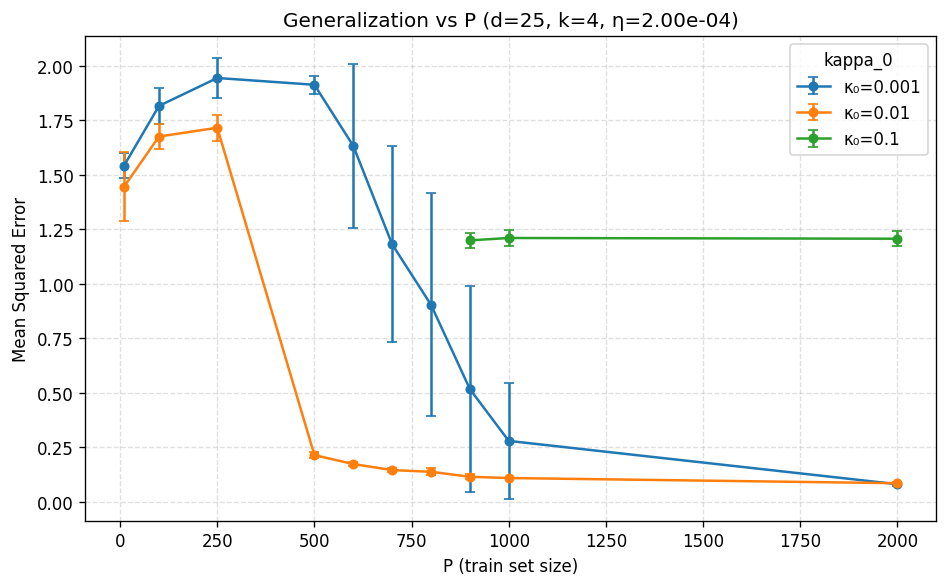

In [2]:
fig, agg = plot_generalization_vs_P("/home/goring/mean_field_langevin/Langevin_training/results/d25_k4_2208_grid/d25_k4", metric="test_mse")
fig.show()


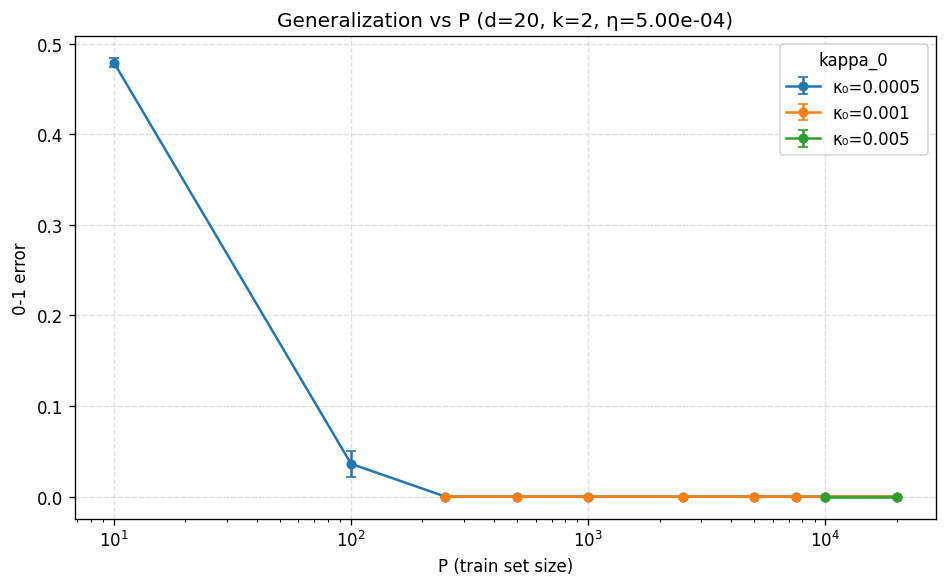

In [15]:
fig, agg = plot_generalization_vs_P("/home/goring/mean_field_langevin/Langevin_training/results_paper1/d20_k2_grid1_lr5e-4", metric="test_error_01")
fig.show()

In [3]:
# ============================
# Generalization plots by gamma (mse, m_S, chi_aa)
# ============================
from pathlib import Path
import json
from typing import Any, Iterable, Optional, Tuple, Union, Dict, List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# -----------------------------
# Loading / normalization
# -----------------------------
def _load_json_listfile(json_path: Union[str, Path]) -> list[dict]:
    """Load a JSON file expected to contain a list of dicts. Returns [] on errors."""
    json_path = Path(json_path)
    try:
        with open(json_path, "r") as f:
            data = json.load(f)
        if isinstance(data, list):
            return data
        elif isinstance(data, dict):
            # Some runs may be saved as dict keyed by run-id; coerce to list of values.
            return list(data.values())
        else:
            return []
    except Exception:
        return []


def _gather_results_from_dir(root: Union[str, Path]) -> list[dict]:
    """Recursively find and read all 'training_results.json' files under root."""
    root = Path(root)
    out: list[dict] = []
    if not root.exists():
        return out
    for p in root.rglob("training_results.json"):
        out.extend(_load_json_listfile(p))
    return out


def results_to_dataframe(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
) -> pd.DataFrame:
    """
    Normalize various inputs to a clean DataFrame.

    Accepts:
      - path to a JSON file (list of dicts);
      - path to a directory (recursively reads any 'training_results.json');
      - an iterable of dicts;
      - a pandas DataFrame.
    """
    if isinstance(source, (str, Path)):
        p = Path(source)
        if p.is_file():
            rows = _load_json_listfile(p)
            df = pd.DataFrame(rows)
        elif p.is_dir():
            rows = _gather_results_from_dir(p)
            df = pd.DataFrame(rows)
        else:
            raise FileNotFoundError(f"Path not found: {p}")
    elif isinstance(source, pd.DataFrame):
        df = source.copy()
    else:
        # Assume iterable of dicts
        df = pd.DataFrame(list(source))

    # Keep only columns we care about (now includes chi_aa)
    wanted = [
        "P",
        "kappa_0",
        "gamma_scaling_exponent",
        "test_error_01",
        "train_error_01",
        "test_mse",
        "train_mse",
        "final_eval_mS",
        "chi_aa",
        "eta",
        "d",
        "k",
        "exp_id",
        "status",
    ]
    existing = [c for c in wanted if c in df.columns]
    df = df[existing].copy()

    # Cast types when possible
    for col in ["P", "d", "k", "exp_id"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")
    for col in [
        "kappa_0",
        "gamma_scaling_exponent",
        "test_error_01",
        "train_error_01",
        "test_mse",
        "train_mse",
        "final_eval_mS",
        "chi_aa",
        "eta",
    ]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Filter to trained runs only
    if "status" in df.columns:
        df = df[df["status"] == "trained"].copy()

    # Ensure required columns exist
    required_base = {"P", "kappa_0", "gamma_scaling_exponent"}
    if not required_base.issubset(df.columns):
        missing = required_base - set(df.columns)
        raise KeyError(f"Missing required columns: {missing}")

    return df.reset_index(drop=True)


# -----------------------------
# Aggregation
# -----------------------------
def aggregate_by_gamma(
    df: pd.DataFrame,
    metric: str,
) -> pd.DataFrame:
    """
    Compute mean, std, count, and 95% CI for `metric` over replicates,
    grouped by (gamma_scaling_exponent, kappa_0, P).

    Returns tidy DataFrame with columns:
        gamma, kappa_0, P, mean, std, n, ci95
    """
    if metric not in df.columns:
        raise KeyError(
            f"Metric column '{metric}' not found. Available: {list(df.columns)}"
        )

    work = df.dropna(subset=[metric, "P", "kappa_0", "gamma_scaling_exponent"]).copy()
    work["P"] = work["P"].astype(float)  # in case of Int64
    work["kappa_0"] = work["kappa_0"].astype(float)
    work["gamma_scaling_exponent"] = work["gamma_scaling_exponent"].astype(float)

    g = (
        work.groupby(["gamma_scaling_exponent", "kappa_0", "P"], as_index=False)[metric]
        .agg(["mean", "std", "count"])
        .reset_index()
        .rename(columns={"count": "n"})
    )
    g["ci95"] = 1.96 * (g["std"] / np.sqrt(g["n"].clip(lower=1)))
    g = g.sort_values(by=["gamma_scaling_exponent", "kappa_0", "P"]).reset_index(drop=True)
    g = g.rename(columns={"gamma_scaling_exponent": "gamma"})
    return g[["gamma", "kappa_0", "P", "mean", "std", "n", "ci95"]]


def _pretty_metric_label(metric: str) -> str:
    m = metric.lower()
    if "error_01" in m:
        return "0–1 error"
    if "test_mse" in m or "mse" in m:
        return "Test Mean Squared Error"
    if "final_eval_ms" in m or m == "m_s":
        return "mₛ (final)"
    if "chi_aa" in m or "chiaa" in m:
        return "χₐₐ"
    return metric


# -----------------------------
# Safe save helper
# -----------------------------
def _safe_save(fig: plt.Figure, desired_path: Optional[Union[str, Path]]) -> Optional[Path]:
    """
    Try to save to desired_path; on PermissionError/OSError, fall back to ./plots.
    Returns the actual path saved (or None if no path was requested).
    """
    if desired_path is None:
        return None
    desired_path = Path(desired_path)
    try:
        desired_path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(desired_path, bbox_inches="tight")
        print(f"Saved figure to: {desired_path}")
        return desired_path
    except (PermissionError, OSError) as e:
        # Fallback
        fallback_dir = Path.cwd() / "plots"
        fallback_dir.mkdir(parents=True, exist_ok=True)
        fallback_path = fallback_dir / desired_path.name
        fig.savefig(fallback_path, bbox_inches="tight")
        print(f"⚠️ Could not save to {desired_path} ({e}). Saved instead to: {fallback_path}")
        return fallback_path


# -----------------------------
# Plotting (one metric, faceted by gamma)
# -----------------------------
def plot_metric_by_gamma(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
    metric: str,
    title: Optional[str] = None,
    log_x: bool = True,
    marker: str = "o",
    linewidth: float = 1.5,
    markersize: float = 5.0,
    save_path: Optional[Union[str, Path]] = None,
) -> Tuple[plt.Figure, pd.DataFrame]:
    """
    Create a figure with one subplot per gamma value, plotting the given metric vs P.
    Each subplot color-codes series by kappa_0 and includes 95% CI error bars.

    Returns (fig, agg_df).
    """
    df = results_to_dataframe(source)
    agg = aggregate_by_gamma(df, metric=metric)

    gammas = sorted(agg["gamma"].unique())
    if len(gammas) == 0:
        raise ValueError("No gamma values found after filtering.")

    # Build a default figure title if not provided and if d/k/eta are uniform
    if title is None:
        parts = []
        for col, label in [("d", "d"), ("k", "k"), ("eta", "η")]:
            if col in df.columns and df[col].notna().any():
                uniq = pd.unique(df[col].dropna())
                if len(uniq) == 1:
                    val = uniq[0]
                    if col == "eta":
                        parts.append(f"{label}={val:.2e}")
                    else:
                        parts.append(f"{label}={int(val)}")
        base = f"{_pretty_metric_label(metric)} vs P"
        title = base + (" (" + ", ".join(parts) + ")" if parts else "")

    # Figure layout: place all gamma panels in one row
    ncols = len(gammas)
    width_per = 5.5
    fig = plt.figure(figsize=(max(8.0, width_per * ncols), 4.8), dpi=120)
    fig.suptitle(title, y=1.02, fontsize=12)

    axes: List[plt.Axes] = []
    for i, gamma in enumerate(gammas, start=1):
        ax = fig.add_subplot(1, ncols, i)
        axes.append(ax)
        gsub = agg[agg["gamma"] == gamma]
        # Plot each kappa_0 series
        for kappa_val, gk in gsub.groupby("kappa_0"):
            xs = gk["P"].values
            ys = gk["mean"].values
            yerr = gk["ci95"].fillna(0.0).values
            ax.errorbar(
                xs,
                ys,
                yerr=yerr,
                fmt=f"-{marker}",
                linewidth=linewidth,
                markersize=markersize,
                capsize=3,
                label=f"κ₀={kappa_val:.2g}",
            )

        ax.set_title(f"γ = {gamma:g}")
        ax.set_xlabel("P (train set size)")
        if i == 1:
            ax.set_ylabel(_pretty_metric_label(metric))
        ax.grid(True, linestyle="--", alpha=0.4)
        if log_x:
            ax.set_xscale("log")
        ax.legend(title="kappa_0", loc="best", fontsize=8)

    fig.tight_layout()
    _safe_save(fig, save_path)
    return fig, agg


# -----------------------------
# Convenience wrapper: three figures (Test MSE, mₛ, χₐₐ)
# -----------------------------
def plot_test_mse_mS_and_chiAA_by_gamma(
    source: Union[str, Path, Iterable[dict], pd.DataFrame],
    log_x: bool = True,
    save_dir: Optional[Union[str, Path]] = None,
    show: bool = True,
) -> Dict[str, Optional[Tuple[plt.Figure, pd.DataFrame]]]:
    """
    Generates up to three separate figures:
      1) Test MSE vs P (faceted by gamma)               -> key "test_mse"
      2) mₛ (final_eval_mS) vs P (faceted by gamma)     -> key "final_eval_mS"
      3) χₐₐ (chi_aa) vs P (faceted by gamma)           -> key "chi_aa"

    If a metric column is missing, that entry will be None and a note is printed.
    Returns a dict mapping metric name -> (figure, aggregated_df) or None.
    """
    results: Dict[str, Optional[Tuple[plt.Figure, pd.DataFrame]]] = {}

    # Ensure we know what's available
    df = results_to_dataframe(source)
    cols = set(df.columns)

    # 1) Test MSE
    save_path_mse = None if save_dir is None else Path(save_dir) / "test_mse_vs_P_by_gamma.png"
    fig_mse, agg_mse = plot_metric_by_gamma(
        df,
        metric="test_mse",
        title=None,
        log_x=log_x,
        save_path=save_path_mse,
    )
    results["test_mse"] = (fig_mse, agg_mse)

    # 2) m_S (final)
    if "final_eval_mS" in cols:
        save_path_ms = None if save_dir is None else Path(save_dir) / "mS_vs_P_by_gamma.png"
        fig_ms, agg_ms = plot_metric_by_gamma(
            df,
            metric="final_eval_mS",
            title=None,
            log_x=log_x,
            save_path=save_path_ms,
        )
        results["final_eval_mS"] = (fig_ms, agg_ms)
    else:
        print("ℹ️ 'final_eval_mS' not found in data; skipping mₛ plot.")
        results["final_eval_mS"] = None

    # 3) chi_aa
    if "chi_aa" in cols:
        save_path_chi = None if save_dir is None else Path(save_dir) / "chi_aa_vs_P_by_gamma.png"
        fig_chi, agg_chi = plot_metric_by_gamma(
            df,
            metric="chi_aa",
            title=None,
            log_x=log_x,
            save_path=save_path_chi,
        )
        results["chi_aa"] = (fig_chi, agg_chi)
    else:
        print("ℹ️ 'chi_aa' not found in data; skipping χₐₐ plot.")
        results["chi_aa"] = None

    if show:
        plt.show()

    return results


print(
    "✅ Ready.\n"
    "Examples:\n"
    "  figs = plot_test_mse_mS_and_chiAA_by_gamma(\n"
    "      '/home/goring/mean_field_langevin/Langevin_training/results_paper1/d35_k4_grid1_lr1e-3_ggrid',\n"
    "      log_x=True,\n"
    "      save_dir='./plots',   # safe, falls back to ./plots if needed\n"
    "      show=True\n"
    "  )\n"
    "\n"
    "  # Single-metric if you want:\n"
    "  fig, agg = plot_metric_by_gamma(<source>, metric='chi_aa', save_path='./plots/chi_aa_by_gamma.png')\n"
)


✅ Ready.
Examples:
  figs = plot_test_mse_mS_and_chiAA_by_gamma(
      '/home/goring/mean_field_langevin/Langevin_training/results_paper1/d35_k4_grid1_lr1e-3_ggrid',
      log_x=True,
      save_dir='./plots',   # safe, falls back to ./plots if needed
      show=True
  )

  # Single-metric if you want:
  fig, agg = plot_metric_by_gamma(<source>, metric='chi_aa', save_path='./plots/chi_aa_by_gamma.png')



⚠️ Could not save to /mnt/data/test_mse_vs_P_by_gamma.png ([Errno 13] Permission denied: '/mnt/data'). Saved instead to: /home/goring/mean_field_langevin/Langevin_training/plots/test_mse_vs_P_by_gamma.png
⚠️ Could not save to /mnt/data/mS_vs_P_by_gamma.png ([Errno 13] Permission denied: '/mnt/data'). Saved instead to: /home/goring/mean_field_langevin/Langevin_training/plots/mS_vs_P_by_gamma.png
ℹ️ 'chi_aa' not found in data; skipping χₐₐ plot.


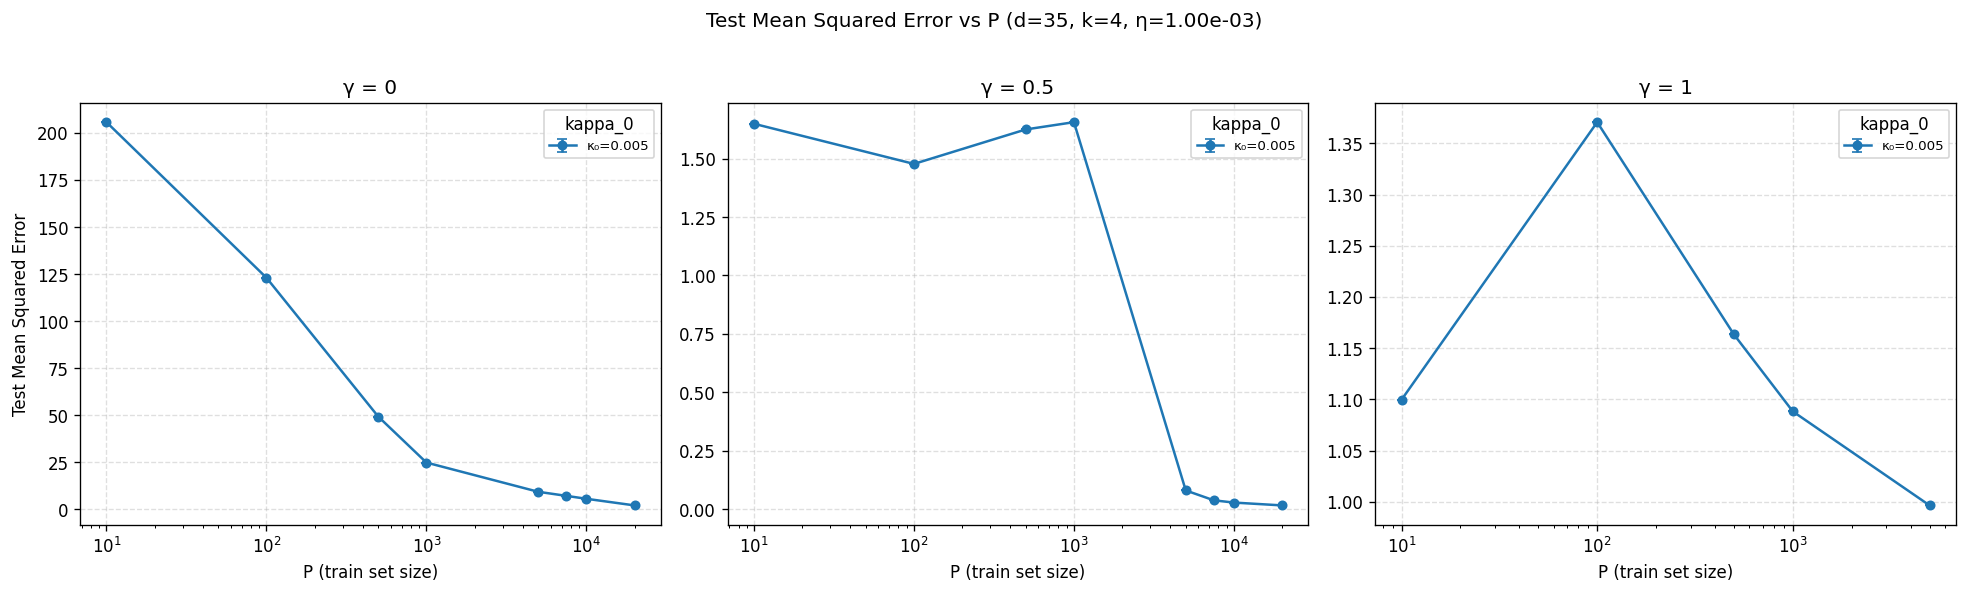

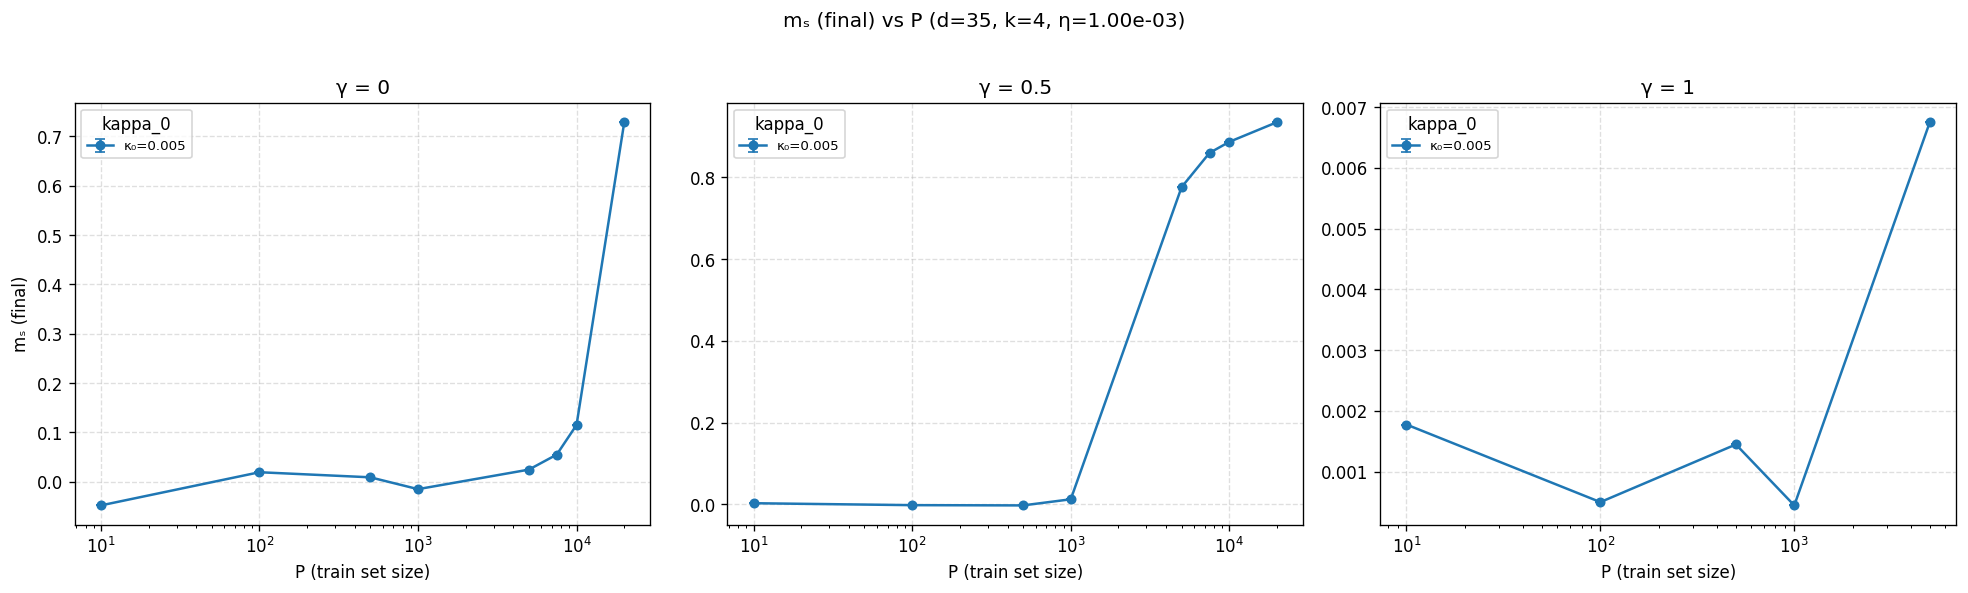

In [5]:
figs = plot_test_mse_mS_and_chiAA_by_gamma(
          '/home/goring/mean_field_langevin/Langevin_training/results_paper1/d35_k4_grid1_lr1e-3_ggrid',
          log_x=True,
          save_dir='/mnt/data')